In [53]:
import cairo
from io import BytesIO
from IPython import display
import numpy as np

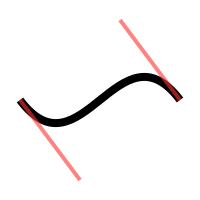

In [54]:
svgio = BytesIO()

with cairo.SVGSurface(svgio, 200, 200) as surface:
    context = cairo.Context(surface)
    context.scale(200, 200)
    context.set_line_width(0.04)
    context.move_to(0.1, 0.5)
    context.curve_to(0.4, 0.9, 0.6, 0.1, 0.9, 0.5)
    context.stroke()
    context.set_source_rgba(1, 0.2, 0.2, 0.6)
    context.set_line_width(0.02)
    context.move_to(0.1, 0.5)
    context.line_to(0.4, 0.9)
    context.move_to(0.6, 0.1)
    context.line_to(0.9, 0.5)
    context.stroke()

display.SVG(svgio.getvalue())

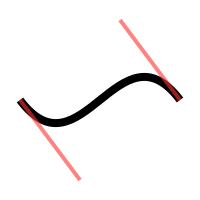

In [87]:
svgio = BytesIO()

with cairo.SVGSurface(svgio, 200, 200) as surface:
    context = cairo.Context(surface)
    context.scale(200, 200)
    context.set_line_width(0.04)
    context.move_to(0.1, 0.5)
    context.curve_to(0.4, 0.9, 0.6, 0.1, 0.9, 0.5)
    context.stroke()
    context.set_source_rgba(1, 0.2, 0.2, 0.6)
    context.set_line_width(0.02)
    context.move_to(0.1, 0.5)
    context.line_to(0.4, 0.9)
    context.move_to(0.6, 0.1)
    context.line_to(0.9, 0.5)
    context.stroke()

display.SVG(svgio.getvalue())

current_height=0.00 next_height=0.20 top_width=0.06 bottom_width=0.25
current_height=0.20 next_height=0.40 top_width=0.25 bottom_width=0.56
current_height=0.40 next_height=0.60 top_width=0.56 bottom_width=0.58
current_height=0.60 next_height=0.80 top_width=0.58 bottom_width=0.29
current_height=0.80 next_height=1.00 top_width=0.29 bottom_width=0.69


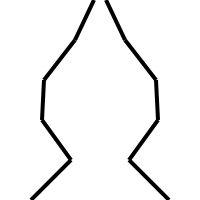

In [137]:
def get_random_width():
    return np.random.randint(0, 100) / 100


def generate_pot(layers=5, width=200, height=200):
    layer_height = 1 / layers
    bottom_width = None
    current_height = 0.0
    svgio = BytesIO()
    with cairo.SVGSurface(svgio, width, height) as surface:
        context = cairo.Context(surface)
        context.scale(width, height)
        context.set_line_width(0.02)
        for layer in range(0, layers):
            top_width = get_random_width() if not bottom_width else bottom_width
            bottom_width = get_random_width()
            # todo: randomize layer height
            next_height = current_height + layer_height
            
            print(f"{current_height=:.2f} {next_height=:.2f} {top_width=:.2f} {bottom_width=:.2f}")

            # draw two lines
            x_a_1 = (1 - top_width) / 2
            x_a_2 = x_a_1 + top_width
            
            x_b_1 = (1 - bottom_width) / 2
            x_b_2 = x_b_1 + bottom_width
            
            context.move_to(x_a_1, current_height)
            context.line_to(x_b_1, next_height)
            context.stroke()
            context.move_to(x_a_2, current_height)
            context.line_to(x_b_2, next_height)
            context.stroke()
        
            # do at the end as we *build down*
            current_height = next_height
            
    return svgio


display.SVG(generate_pot().getvalue())

In [118]:
1 / 5

0.2